In [2]:
#from libs.prefect_helpers import *
from libs.data_manipulation import *
from libs.feature_generation import *
from libs.dim_reduction import *
from libs.football_plots import *
from libs.clustering import *
from libs.convex_hull import *
from libs.InteractivePitchUI import InteractivePitch, PitchDisplay


import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree

from mplsoccer import *
import pandas as pd
import numpy as np
import os
# Click player into the pitch and take those player and apply Ripleys K to them. And then maybe PCA


In [ ]:
# Step 6: Extract match data from tracking data
data = compile_team_tracking_data("data/H_EURO2024GERMANY", "Denmark")
#data = calculate_possession(data)
#data = data[data["Possession"] == "Home"]

#print(data.head())
one_match = extract_one_match(data, 4)


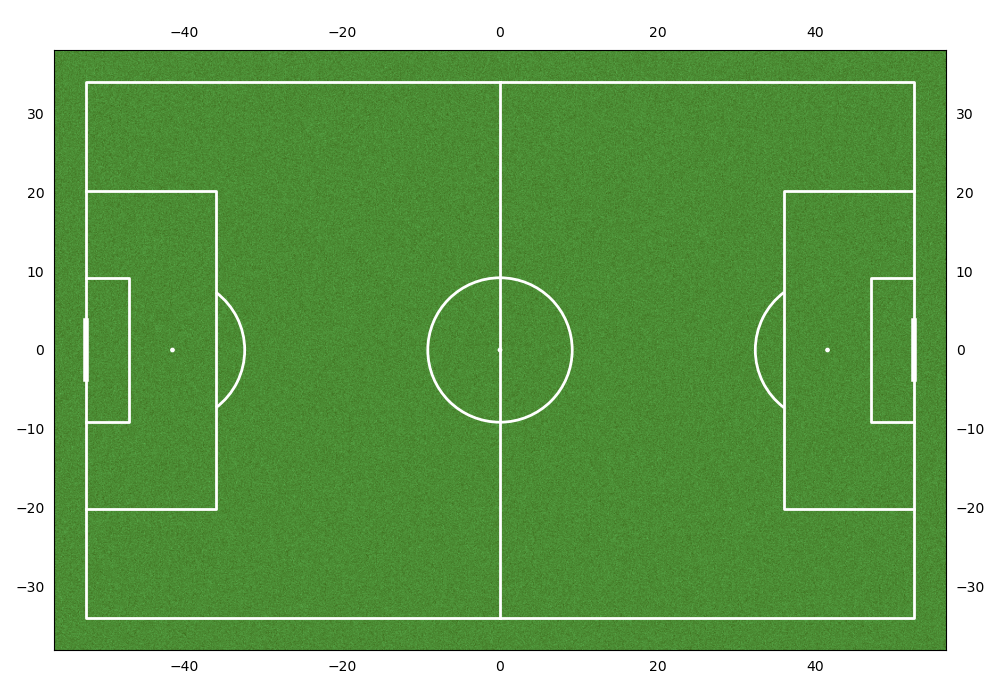

143297
<function InteractivePitch.calculate_wasserstein.<locals>.<lambda> at 0x7f9d3d6a7ac0>
2
11969
Wasserstein calculated, closest situations: [0, 143328, 336384, 262224, 26736, 325488, 168048, 148176, 210672, 148128]
174046
<function InteractivePitch.calculate_wasserstein.<locals>.<lambda> at 0x7f9d3a0e2d40>
2
11969
Wasserstein calculated, closest situations: [174048, 174096, 174000, 2160, 346032, 68688, 174144, 189792, 174480, 176400]


In [3]:
%matplotlib widget

interactive_pitch = InteractivePitch(one_match)


In [6]:
index_displayer = PitchDisplay(one_match,interactive_pitch.similar_situation_indices)

In [8]:
from libs.similar_movement import *


distance_index_list = find_similar_movement(one_match,interactive_pitch.similar_situation_indices[:100])
#find_similar_movement_given_vector(one_match, interactive_pitch.vectors[0], interactive_pitch.similar_situation_indices[:100] )

TypeError: find_similar_movement() missing 1 required positional argument: 'indices_of_candidate_sequeces'

In [13]:
print(distance_index_list)

[(3587.365292710613, 172032), (3705.1993733517947, 435168), (2030.004556403545, 13824), (1956.385755969091, 4800), (2676.567001976182, 125040), (2777.009587447534, 60720), (2444.718269127901, 552384), (3646.103397786095, 360816), (2951.9289829896647, 552336), (3968.8921972356516, 89808), (1769.8757312340106, 338256), (1711.1106876195634, 330480), (3725.376183304182, 517728), (3609.873432950361, 314352), (3850.2300225657164, 532128), (3523.762319441916, 537744), (3736.9623582133577, 518016), (3015.997467286893, 224208), (496.0421765263134, 330720), (2869.219354792391, 224256), (2259.6245954805217, 298560), (2961.291858109327, 314976), (2747.067113100329, 524496), (1151.740345708632, 125136), (4202.162494238989, 141024), (2700.6542919315557, 207600), (1521.6067307556784, 545616), (3702.0227114444224, 352608), (1801.9400140346959, 60768), (3646.297027236592, 548688), (2002.66001375597, 180960), (3710.5724151893605, 96864), (3553.638426496442, 23232), (2531.669751907596, 80448), (1782.1983

In [14]:
distance_index_list = sorted(distance_index_list, key = lambda x : x[0])

In [15]:
print(len(distance_index_list))

97


In [16]:
index_displayer_2 = PitchDisplay(one_match, [index for (_,index) in distance_index_list])